In [1]:
import numpy as np
import matplotlib.pyplot as plt

[3.4004676586173153, 7.971474270894178, 18.686959686411498, 43.806509367607575, 102.69248155812775]


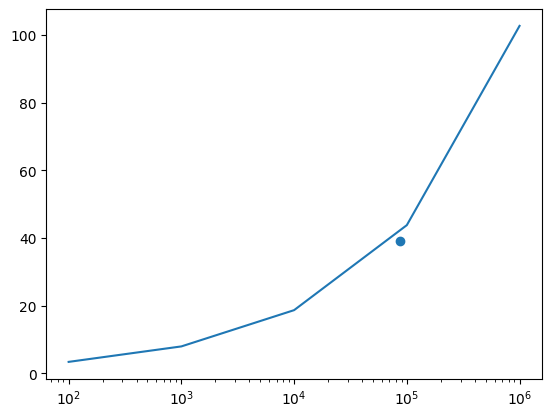

In [9]:
#(N)^(0.37)e^(-0.48) plot for N = [100,1000,10000,100000] give log plot
N = [100,1000,10000,100000, 1000000]
y = []
for i in N:
    y.append((i)**(0.37)*np.exp(-0.48))
plt.plot(N,y)
plt.scatter([86345], [39.06])
# plt.yscale('log')
print(y)
plt.xscale('log')
plt.show()

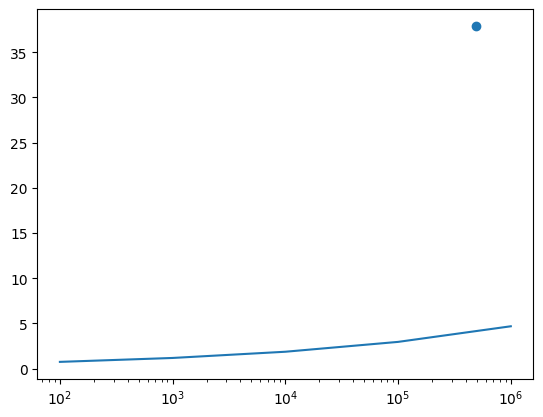

In [10]:
#(N)^(0.20)e^(-1.22) plot for N = [100,1000,10000,100000,1000000] give log plot

y2 = []
for i in N:
    y2.append((i)**(0.20)*np.exp(-1.22))
plt.plot(N,y2)
plt.scatter([493616 ], [37.90 ])
plt.xscale('log')
plt.show()
    

In [11]:
import plotly.graph_objs as go
import numpy as np

# Data preparation
N = [100, 1000, 10000, 100000, 1000000]
y = [(i)**(0.37)*np.exp(-0.48) for i in N]

# Plotting with Plotly
plotly_fig = go.Figure()
plotly_fig.add_trace(go.Scatter(x=N, y=y, mode='lines', name='y = N^(0.37) * exp(-0.48)'))
plotly_fig.add_trace(go.Scatter(x=[86345], y=[39.06], mode='markers', name='Point (86345, 39.06)', marker=dict(color='red')))
plotly_fig.update_layout(
    title='Ecuador 2015 plotted on scaling law with $\\eta = 0.37$ and $C = 0.48$',
    xaxis=dict(type='log', title_text='N'),
    yaxis=dict(title_text='y')
)

# Display the Plotly plot
plotly_fig.show()


ModuleNotFoundError: No module named 'plotly'

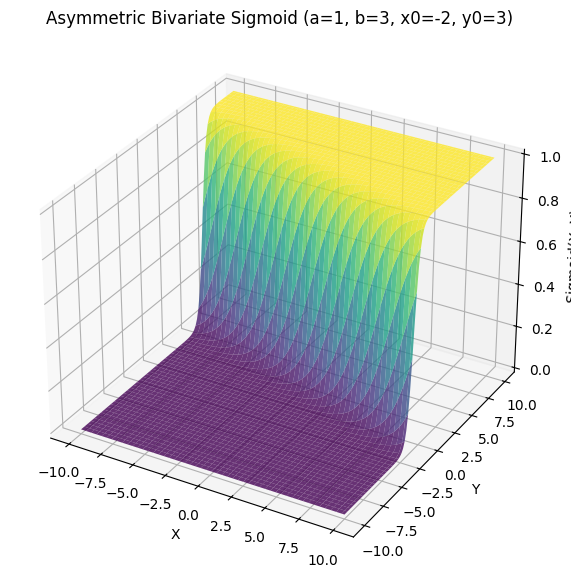

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bivariate_sigmoid_asymmetric(x, y, a, b, x0, y0):
    """
    Bivariate sigmoid function with asymmetric bias.
    
    :param x: x-coordinate
    :param y: y-coordinate
    :param a: Parameter controlling the scaling in the x direction
    :param b: Parameter controlling the scaling in the y direction
    :param x0: Bias for the x direction
    :param y0: Bias for the y direction
    :return: Sigmoid value
    """
    return 1 / (1 + np.exp(-(a * (x - x0) + b * (y - y0))))

# Define the range for x and y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Define parameters
a = 1   # scaling in the x direction
b = 3   # scaling in the y direction
x0 = -2  # Asymmetric bias in the x direction
y0 = 3   # Asymmetric bias in the y direction

# Calculate Z values using the asymmetric bivariate sigmoid function
Z = bivariate_sigmoid_asymmetric(X, Y, a, b, x0, y0)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Sigmoid(X, Y)')
ax.set_title(f'Asymmetric Bivariate Sigmoid (a={a}, b={b}, x0={x0}, y0={y0})')

# Show plot
plt.show()


In [6]:
from scipy.stats import norm
import numpy
from numpy import random as np_random
from distributions import bivariate_lognormal
mean = np.array([0, 0])
n = 1000
cov_matrix = np.array([[1, 0.5], [0.5, 1]])
key = np_random.PRNGKey(0)
lognormal_samples = bivariate_lognormal(key, mean, cov_matrix, n)
# Convert to uniform samples using the standard normal CDF
u1 = norm.cdf(lognormal_samples[:, 0])
u2 = norm.cdf(lognormal_samples[:, 1])

#plot copula
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u1, u2, Z, c=Z, cmap='viridis')
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_title('Copula of U1 and U2')
plt.show()




ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000,) and arg 1 with shape (2,).